<a href="https://colab.research.google.com/github/gveloso7/Exercicios-DSA/blob/main/Machine_Learning_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando dados históricos, é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [ ]:
df.shape

(500, 2)

In [ ]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
#Verificar se há valores nulos
df.isnull().sum()

,0
horas_estudo_mes,0
salario,0


In [ ]:
#Correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [ ]:
#Resumo estatístico
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [ ]:
#Resumo estatístico da variável preditora
df['horas_estudo_mes'].describe()

,horas_estudo_mes
count,500.000000
mean,50.060000
std,14.659406
min,1.000000
25%,39.750000
50%,50.000000
75%,60.000000
max,100.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

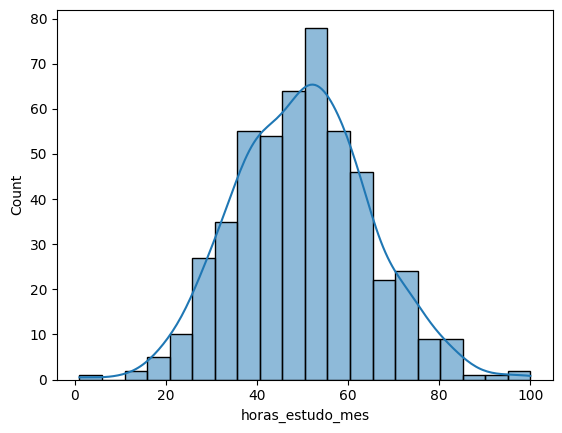

In [ ]:
#Histograma da variável preditora
sns.histplot(data = df, x = 'horas_estudo_mes', kde = True)

In [ ]:
#Preparação dos dados
x = np.array(df['horas_estudo_mes'])

#Ajustar o shape de x
x = x.reshape(-1,1)

y = df['salario']

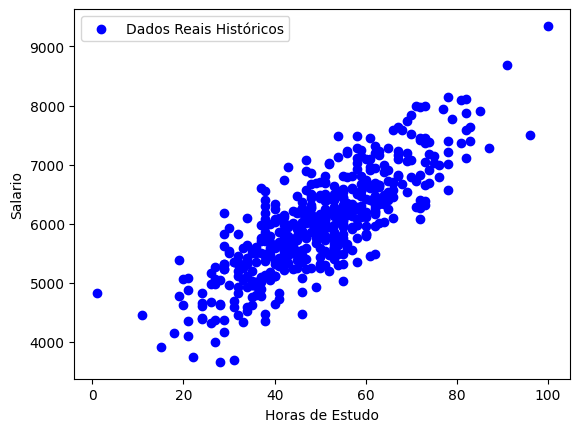

In [ ]:
#Gráfico de dispersão entre x e y

plt.scatter(x, y, color = 'blue', label = 'Dados Reais Históricos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salario')
plt.legend()
plt.show()

In [ ]:
#Divisão de dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
x_treino.shape

(400, 1)

In [ ]:
x_teste.shape

(100, 1)

In [ ]:
y_treino.shape

(400,)

In [ ]:
y_teste.shape

(100,)

In [ ]:
#Modelagem preditiva
#Modelo de regressão linear simples
modelo = LinearRegression()

#Treinamento do modelo
modelo.fit(x_treino,y_treino)

LinearRegression()

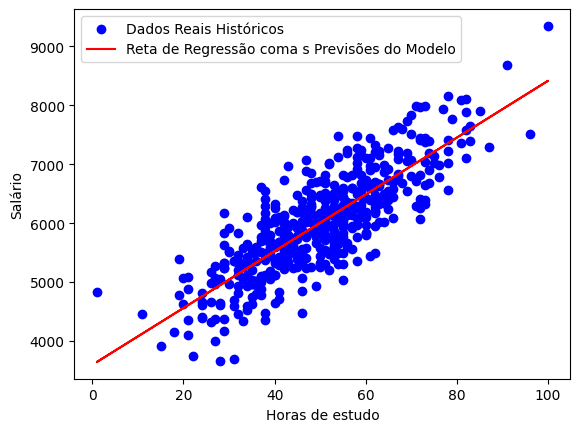

In [ ]:
#Plot
plt.scatter(x,y, color = 'blue', label = 'Dados Reais Históricos')
plt.plot(x,modelo.predict(x), color = 'red', label = 'Reta de Regressão coma s Previsões do Modelo')
plt.xlabel('Horas de estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [ ]:
#Avaliar o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f'Coeficiente R^2:: {score: .2f}')

Coeficiente R^2::  0.59


In [ ]:
#Intercepto - parâmetro w0
modelo.intercept_

np.float64(3596.7837243727545)

In [ ]:
modelo.coef_

array([48.18185277])

In [ ]:
##Deploy
#Definifir um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

#Fazer a previsão com o modelo treinado

salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de",horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [ ]:
#Mesmo resultado anterior usando os parâmetros (coeficientes) coeficientes aprendidos pelo modelo
#y_novo= w0 + w1 *x

salario = modelo.intercept_+(modelo.coef_*horas_estudo_novo)
print(salario)

[[5909.5126574]]
